In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import sys
import os

sys.path.append("../../")
from common.constants import DATAFOLDER

In [2]:
datafile_path = os.path.join(DATAFOLDER.data_root_path, "nexra_data", "2020", "20201012", "06_Cloud_amount.parquet.gzip")

data = pd.read_parquet(datafile_path)

data.head()

,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
-88.3125,0.991060,0.992523,0.993695,0.993908,0.994120,0.994331,0.994540,0.994748,0.994954,0.995158,...,0.764301,0.795944,0.827328,0.858440,0.889268,0.919801,0.950027,0.979934,0.988180,0.989612
-87.1875,0.986326,0.988708,0.991059,0.993378,0.995664,0.997038,0.997039,0.997042,0.997047,0.997055,...,0.951899,0.956549,0.961216,0.965896,0.970589,0.973978,0.976503,0.979001,0.981471,0.983913
-86.0625,0.992630,0.992645,0.992668,0.992699,0.992737,0.992782,0.992826,0.992853,0.992887,0.985859,...,0.960130,0.976590,0.983627,0.990604,0.992702,0.992671,0.992647,0.992631,0.992623,0.992623
-84.9375,0.901757,0.866713,0.827898,0.789656,0.752003,0.714954,0.678521,0.642719,0.607561,0.573062,...,0.942972,0.945142,0.947424,0.949816,0.952318,0.954929,0.957648,0.960473,0.963403,0.936268


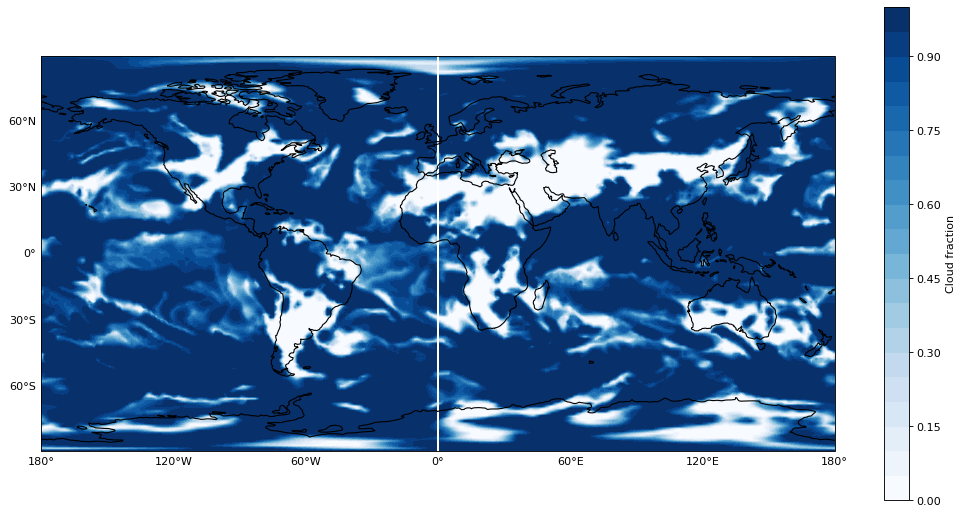

In [3]:
grid_mesh = np.meshgrid(data.columns.astype(np.float32).to_numpy(), data.index.astype(np.float32).to_numpy())
x_grid, y_grid = grid_mesh[0], grid_mesh[1]

plt.figure(figsize=(16, 8), dpi=80)
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([90, 155, -10, 40])
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(draw_labels=True, alpha=0)
gl.right_labels = False
gl.top_labels = False

clevs = np.arange(0, 1.05, 0.05)
cmap = cm.Blues
norm = mcolors.BoundaryNorm(clevs, cmap.N)
cs = ax.contourf(x_grid, y_grid, data, clevs, cmap=cmap, norm=norm)
cbar = plt.colorbar(cs, orientation="vertical")

# Fig Info
cbar.set_label("Cloud fraction")

plt.show()
plt.close()

In [4]:
data

,0.5625,1.6875,2.8125,3.9375,5.0625,6.1875,7.3125,8.4375,9.5625,10.6875,...,349.3125,350.4375,351.5625,352.6875,353.8125,354.9375,356.0625,357.1875,358.3125,359.4375
-89.4375,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
-88.3125,0.991060,0.992523,0.993695,0.993908,0.994120,0.994331,0.994540,0.994748,0.994954,0.995158,...,0.764301,0.795944,0.827328,0.858440,0.889268,0.919801,0.950027,0.979934,0.988180,0.989612
-87.1875,0.986326,0.988708,0.991059,0.993378,0.995664,0.997038,0.997039,0.997042,0.997047,0.997055,...,0.951899,0.956549,0.961216,0.965896,0.970589,0.973978,0.976503,0.979001,0.981471,0.983913
-86.0625,0.992630,0.992645,0.992668,0.992699,0.992737,0.992782,0.992826,0.992853,0.992887,0.985859,...,0.960130,0.976590,0.983627,0.990604,0.992702,0.992671,0.992647,0.992631,0.992623,0.992623
-84.9375,0.901757,0.866713,0.827898,0.789656,0.752003,0.714954,0.678521,0.642719,0.607561,0.573062,...,0.942972,0.945142,0.947424,0.949816,0.952318,0.954929,0.957648,0.960473,0.963403,0.936268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84.9375,0.286409,0.326150,0.365714,0.405087,0.444254,0.483199,0.519688,0.546534,0.572758,0.598350,...,0.295069,0.295011,0.294690,0.294107,0.290808,0.286743,0.282517,0.278130,0.273586,0.268885
86.0625,0.090081,0.110581,0.130766,0.150626,0.169994,0.188227,0.206081,0.223548,0.240624,0.257299,...,0.124839,0.120030,0.114987,0.109713,0.104209,0.098478,0.094516,0.090672,0.086519,0.082059
87.1875,0.188496,0.193823,0.199402,0.205233,0.211314,0.217641,0.224212,0.231026,0.238079,0.245368,...,0.153165,0.155947,0.158890,0.161993,0.165256,0.168676,0.172253,0.175985,0.179870,0.183908
88.3125,0.577057,0.573263,0.569592,0.566045,0.562625,0.559332,0.556167,0.553132,0.550228,0.547456,...,0.551139,0.553527,0.556046,0.558695,0.561472,0.564377,0.567409,0.570566,0.573847,0.577252


In [5]:
clevs

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])